# Health site near you

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Import Datasets

The **Region XI Facilities Dataset** contains data regarding the available health amenities in the Davao Region. This includes data from 5 provinces: Davao de Oro, Davao del Norte, Davao del Sur, Davao Occidental, and Davao Oriental.

The dataset may be found [here](https://nhfr.doh.gov.ph/Province_Facility_detailslist.php?t=Province_Facility_details&z_regname=%3D&x_regname=REGION+XI+%28DAVAO+REGION%29)

The **NCR Facilities Dataset** contains data regarding the available health amenities in the NCR Region. This includes data from City of Manila, Fourth District, Second District, and Third District.

The dataset may be found [here](https://nhfr.doh.gov.ph/Province_Facility_detailslist.php?t=Province_Facility_details&z_regname=%3D&x_regname=NATIONAL+CAPITAL+REGION+%28NCR%29)

In [2]:
davao = pd.read_csv('datasets/regionxi_facilities.csv')
davao.head()

,Region Name,Province Name,No. of Barangay Health Station,No. of Rural Health Unit,No. of City Health Office,No. of Hospitals,No. of Government Hospitals,No. of Private Hospitals,Without License,With License,TOTAL,Infirmary,Birthing Homes
0,REGION XI (DAVAO REGION),DAVAO DE ORO,238,11,0,5,4,1,0,20,269,7,8
1,REGION XI (DAVAO REGION),DAVAO DEL NORTE,231,13,0,18,4,14,1,64,311,12,37
2,REGION XI (DAVAO REGION),DAVAO DEL SUR,423,29,0,39,2,37,3,128,587,29,67
3,REGION XI (DAVAO REGION),DAVAO OCCIDENTAL,105,5,0,2,1,1,1,9,120,7,1
4,REGION XI (DAVAO REGION),DAVAO ORIENTAL,197,11,0,3,2,1,0,10,219,5,3


In [3]:
manila = pd.read_csv('datasets/ncr_facilities.csv')
manila.head()

,Region Name,Province Name,No. of Barangay Health Station,No. of Rural Health Unit,No. of City Health Office,No. of Hospitals,No. of Government Hospitals,No. of Private Hospitals,Without License,With License,TOTAL,Infirmary,Birthing Homes
0,NATIONAL CAPITAL REGION (NCR),"NCR, CITY OF MANILA, FIRST DISTRICT (Not a Pro...",1,59,0,30,12,18,3,27,90,0,0
1,NATIONAL CAPITAL REGION (NCR),"NCR, FOURTH DISTRICT (Not a Province)",3,143,0,44,10,34,2,61,209,2,17
2,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",10,168,0,96,22,74,17,136,331,11,46
3,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",8,125,0,21,6,15,4,46,187,6,27


### Combine datasets

We will be exploring data from Davao del Sur and the City of Manila

In [4]:
df = davao[davao['Province Name'] == 'DAVAO DEL SUR']
df = df.append(manila[manila['Province Name'] == 'NCR, CITY OF MANILA, FIRST DISTRICT (Not a Province)'])
df = df.replace(to_replace ="NCR, CITY OF MANILA, FIRST DISTRICT (Not a Province)", value ="CITY OF MANILA")
df.head()

,Region Name,Province Name,No. of Barangay Health Station,No. of Rural Health Unit,No. of City Health Office,No. of Hospitals,No. of Government Hospitals,No. of Private Hospitals,Without License,With License,TOTAL,Infirmary,Birthing Homes
2,REGION XI (DAVAO REGION),DAVAO DEL SUR,423,29,0,39,2,37,3,128,587,29,67
0,NATIONAL CAPITAL REGION (NCR),CITY OF MANILA,1,59,0,30,12,18,3,27,90,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 2 to 0
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Region Name                     2 non-null      object
 1   Province Name                   2 non-null      object
 2   No. of Barangay Health Station  2 non-null      int64 
 3   No. of Rural Health Unit        2 non-null      int64 
 4   No. of City Health Office       2 non-null      int64 
 5   No. of Hospitals                2 non-null      int64 
 6   No. of Government Hospitals     2 non-null      int64 
 7   No. of Private Hospitals        2 non-null      int64 
 8   Without License                 2 non-null      int64 
 9   With License                    2 non-null      int64 
 10  TOTAL                           2 non-null      int64 
 11  Infirmary                       2 non-null      int64 
 12  Birthing Homes                  2 non-null      int64 

In [6]:
df.describe()

,No. of Barangay Health Station,No. of Rural Health Unit,No. of City Health Office,No. of Hospitals,No. of Government Hospitals,No. of Private Hospitals,Without License,With License,TOTAL,Infirmary,Birthing Homes
count,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,2.00000,2.000000,2.000000
mean,212.000000,44.000000,0.0,34.500000,7.000000,27.500000,3.0,77.500000,338.50000,14.500000,33.500000
std,298.399062,21.213203,0.0,6.363961,7.071068,13.435029,0.0,71.417785,351.43207,20.506097,47.376154
min,1.000000,29.000000,0.0,30.000000,2.000000,18.000000,3.0,27.000000,90.00000,0.000000,0.000000
25%,106.500000,36.500000,0.0,32.250000,4.500000,22.750000,3.0,52.250000,214.25000,7.250000,16.750000
50%,212.000000,44.000000,0.0,34.500000,7.000000,27.500000,3.0,77.500000,338.50000,14.500000,33.500000
75%,317.500000,51.500000,0.0,36.750000,9.500000,32.250000,3.0,102.750000,462.75000,21.750000,50.250000
max,423.000000,59.000000,0.0,39.000000,12.000000,37.000000,3.0,128.000000,587.00000,29.000000,67.000000


## Visualization

### How many health amenities are there in total in each province?

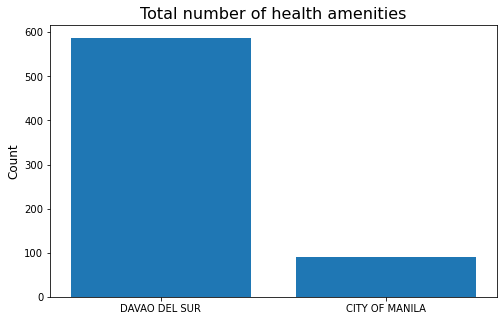

In [7]:
fig = plt.figure(figsize = (8, 5))
plt.bar(df['Province Name'],df['TOTAL'])

plt.title('Total number of health amenities', fontsize=16)
plt.ylabel('Count', fontsize=12)

plt.show()

### Number of barangay health stations in each province

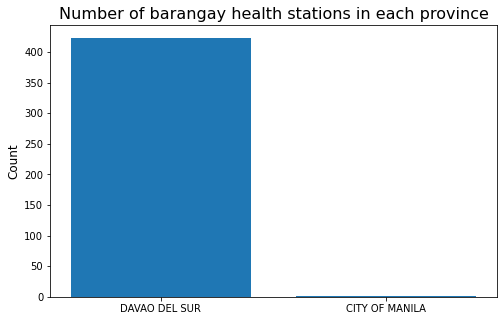

In [8]:
fig = plt.figure(figsize = (8, 5))
plt.bar(df['Province Name'],df['No. of Barangay Health Station'])

plt.title('Number of barangay health stations in each province', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.show()

### Distribution of hospitals in each province

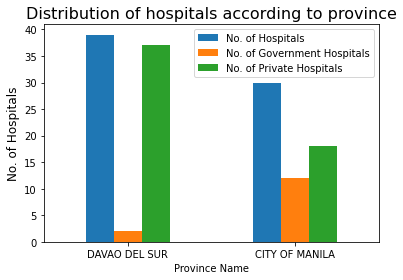

In [9]:
provinces = 'Province Name'
hospitals = ['No. of Hospitals','No. of Government Hospitals','No. of Private Hospitals']
ax = df.plot(x=provinces, y=hospitals, kind='bar')

plt.rcParams["figure.figsize"] = (10,7)
plt.title('Distribution of hospitals according to province', fontsize=16)
plt.ylabel('No. of Hospitals', fontsize=12)
plt.xticks(rotation=0)
plt.show()

### Infirmary and Birthing Homes in each province

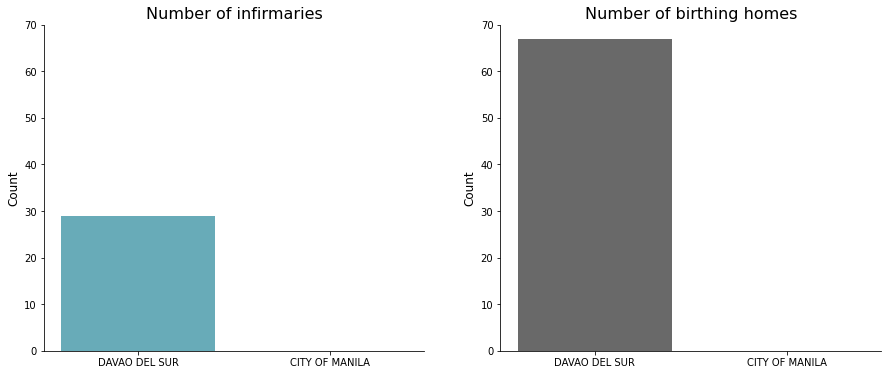

In [10]:
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(1,2,1)

ax.bar(df['Province Name'],df['Infirmary'], color='#68abb8')
ax.set_title('Number of infirmaries', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_ylim([0,70])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax2 = fig.add_subplot(1,2,2)

ax2.bar(df['Province Name'],df['Birthing Homes'], color='dimgray')
ax2.set_title('Number of birthing homes', fontsize=16)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_ylim([0,70])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.grid(False)

### How many of the health amenities in each province have a license and how many do not?

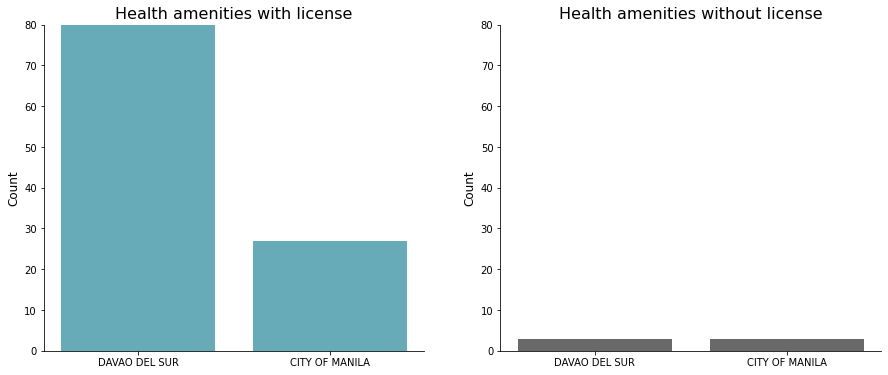

In [11]:
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(1,2,1)

ax.bar(df['Province Name'],df['With License'], color='#68abb8')
ax.set_title('Health amenities with license', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_ylim([0,80])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax2 = fig.add_subplot(1,2,2)

ax2.bar(df['Province Name'],df['Without License'], color='dimgray')
ax2.set_title('Health amenities without license', fontsize=16)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_ylim([0,80])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.grid(False)

### Distribution of health amenities

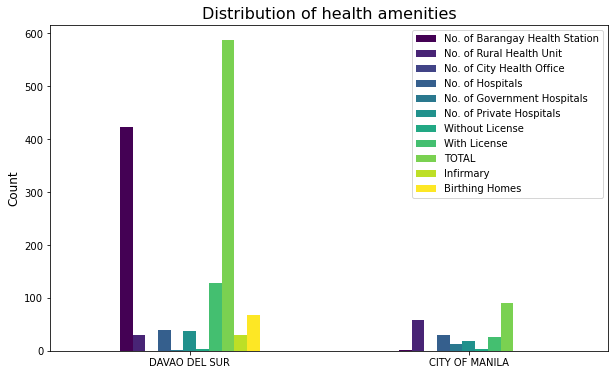

In [12]:
ax = df.plot(kind='bar', figsize=(10, 6), cmap=plt.cm.viridis)

ax.set_title('Distribution of health amenities', fontsize=16)
ax.set_xticklabels(df['Province Name'], rotation=0)
ax.set_ylabel('Count', fontsize=12);
# plt.xticks(rotation=0)

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

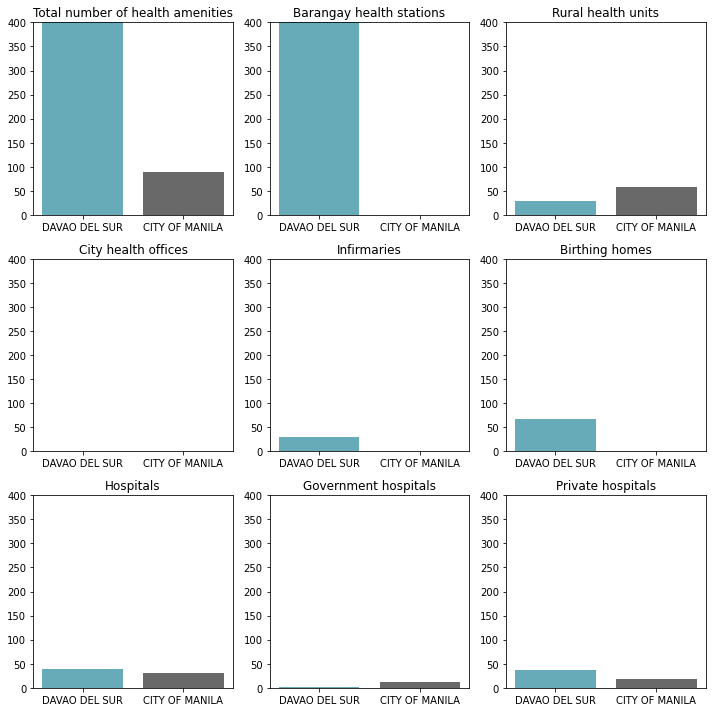

In [19]:
fig, axs = plt.subplots(3,3)
fig.set_figheight(10)
fig.set_figwidth(10)

# Total number of health amenities
axs[0,0].bar(df['Province Name'],df['TOTAL'], color=['#68abb8','dimgray'])
axs[0,0].set_title('Total number of health amenities')
axs[0,0].set_ylim([0,400])

# Barangay health stations
axs[0,1].bar(df['Province Name'],df['No. of Barangay Health Station'], color=['#68abb8','dimgray'])
axs[0,1].set_title('Barangay health stations')
axs[0,1].set_ylim([0,400])

# Rural health units
axs[0,2].bar(df['Province Name'],df['No. of Rural Health Unit'], color=['#68abb8','dimgray'])
axs[0,2].set_title('Rural health units')
axs[0,2].set_ylim([0,400])

# City health offices
axs[1,0].bar(df['Province Name'],df['No. of City Health Office'], color=['#68abb8','dimgray'])
axs[1,0].set_title('City health offices')
axs[1,0].set_ylim([0,400])

# Infirmaries
axs[1,1].bar(df['Province Name'],df['Infirmary'], color=['#68abb8','dimgray'])
axs[1,1].set_title('Infirmaries')
axs[1,1].set_ylim([0,400])

# Birthing homes
axs[1,2].bar(df['Province Name'],df['Birthing Homes'], color=['#68abb8','dimgray'])
axs[1,2].set_title('Birthing homes')
axs[1,2].set_ylim([0,400])

# Hospitals
axs[2,0].bar(df['Province Name'],df['No. of Hospitals'], color=['#68abb8','dimgray'])
axs[2,0].set_title('Hospitals')
axs[2,0].set_ylim([0,400])

# Government hospitals
axs[2,1].bar(df['Province Name'],df['No. of Government Hospitals'], color=['#68abb8','dimgray'])
axs[2,1].set_title('Government hospitals')
axs[2,1].set_ylim([0,400])

# Private hospitals
axs[2,2].bar(df['Province Name'],df['No. of Private Hospitals'], color=['#68abb8','dimgray'])
axs[2,2].set_title('Private hospitals')
axs[2,2].set_ylim([0,400])

fig.tight_layout()
plt.savefig('visualization.jpg')